2019 Jan 31 <br>
One last check: does ODR really fit the data the way I expect it to?

In [10]:
%matplotlib inline

from scipy.odr import *
from numpy.random import rand, randn
import numpy as np
import matplotlib.pyplot as plt

# Define a function to fit the data with.
def lin_func(p, x):
    m, c = p
    return m*x + c

[0.58092355 0.90888526]
Beta: [0.5623954  0.91986823]
Beta Std Error: [0.01232755 0.00717208]
Beta Covariance: [[ 1.42249366e-04 -7.05461752e-05]
 [-7.05461752e-05  4.81490106e-05]]
Residual Variance: 1.06832494659
Inverse Condition #: 0.234980211946
Reason(s) for Halting:
  Sum of squares convergence


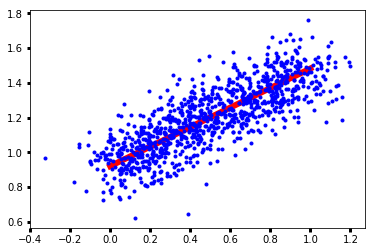

In [21]:
x = np.linspace(0, 1, 1000)

# slope and intercept
p = rand(2)

y = lin_func(p, x)

noise = 0.1
noisy_x = randn(len(x))*noise + x
noisy_y = randn(len(y))*noise + y

plt.plot(noisy_x, noisy_y, 'b.')

# Create a model for fitting.
lin_model = Model(lin_func)

# Create a RealData object using our initiated data from above.
data = RealData(noisy_x, noisy_y, sx=noise, sy=noise)

# Set up ODR with the model and data.
odr = ODR(data, lin_model, beta0=[0., 0.])

# Run the regression.
out = odr.run()

# Use the in-built pprint method to give us results.
print(p)
out.pprint()

plt.plot(x, lin_func(out.beta, x), color='red', lw=6, zorder=-1)

# Looks good to me!